In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install pandas

In [3]:
import pandas as pd

In [5]:
import numpy as np

In [9]:
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
import matplotlib.pyplot as plt

In [12]:
from pathlib import Path
import os.path

In [13]:

from sklearn.model_selection import train_test_split

In [33]:
image_dir = Path("F:\Fish_project\images.cv_jzk6llhf18tm3k0kyttxz\data\data_set")


In [34]:
train_file_paths  = list(image_dir.glob(r'train/*/*.jpg'))
test_file_paths = list(image_dir.glob(r'test/*/*.jpg'))
val_file_paths = list(image_dir.glob(r'val/*/*.jpg'))

In [35]:
len(train_file_paths),len(test_file_paths),len(val_file_paths)

(6225, 3187, 1092)

In [36]:
train_file_paths


[WindowsPath('F:/Fish_project/images.cv_jzk6llhf18tm3k0kyttxz/data/data_set/train/animal fish/0055ESUKGS38.jpg'),
 WindowsPath('F:/Fish_project/images.cv_jzk6llhf18tm3k0kyttxz/data/data_set/train/animal fish/00H9IGEXR8N1.jpg'),
 WindowsPath('F:/Fish_project/images.cv_jzk6llhf18tm3k0kyttxz/data/data_set/train/animal fish/01KOCK58MEGR.jpg'),
 WindowsPath('F:/Fish_project/images.cv_jzk6llhf18tm3k0kyttxz/data/data_set/train/animal fish/02NB4GQNWVRW.jpg'),
 WindowsPath('F:/Fish_project/images.cv_jzk6llhf18tm3k0kyttxz/data/data_set/train/animal fish/04J91BOQEP2Q.jpg'),
 WindowsPath('F:/Fish_project/images.cv_jzk6llhf18tm3k0kyttxz/data/data_set/train/animal fish/05KGHV2JSURU.jpg'),
 WindowsPath('F:/Fish_project/images.cv_jzk6llhf18tm3k0kyttxz/data/data_set/train/animal fish/09HREQ5U6TO6.jpg'),
 WindowsPath('F:/Fish_project/images.cv_jzk6llhf18tm3k0kyttxz/data/data_set/train/animal fish/0DSM1NY3WE0O.jpg'),
 WindowsPath('F:/Fish_project/images.cv_jzk6llhf18tm3k0kyttxz/data/data_set/train/animal

In [37]:

train_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_file_paths))

In [38]:
train_file_paths = pd.Series(train_file_paths, name = "Filepath").astype(str)
train_labels = pd.Series(train_labels, name="Label")

In [39]:
train_df = pd.concat([train_file_paths,train_labels],axis=1)

In [40]:

train_df

,Filepath,Label
0,F:\Fish_project\images.cv_jzk6llhf18tm3k0kyttx...,animal fish
1,F:\Fish_project\images.cv_jzk6llhf18tm3k0kyttx...,animal fish
2,F:\Fish_project\images.cv_jzk6llhf18tm3k0kyttx...,animal fish
3,F:\Fish_project\images.cv_jzk6llhf18tm3k0kyttx...,animal fish
4,F:\Fish_project\images.cv_jzk6llhf18tm3k0kyttx...,animal fish
...,...,...
6220,F:\Fish_project\images.cv_jzk6llhf18tm3k0kyttx...,fish sea_food trout
6221,F:\Fish_project\images.cv_jzk6llhf18tm3k0kyttx...,fish sea_food trout
6222,F:\Fish_project\images.cv_jzk6llhf18tm3k0kyttx...,fish sea_food trout
6223,F:\Fish_project\images.cv_jzk6llhf18tm3k0kyttx...,fish sea_food trout


In [41]:
train_dir = r"F:/Fish_project/images.cv_jzk6llhf18tm3k0kyttxz/data/data_set/train"
test_dir = r"F:/Fish_project/images.cv_jzk6llhf18tm3k0kyttxz/data/data_set/test"
val_dir = r"F:/Fish_project/images.cv_jzk6llhf18tm3k0kyttxz/data/data_set/val"

image_size = (256,256)
batch_size = 32
channels = 3
Epochs = 50

In [42]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle = True,
    image_size = (256,256),
    batch_size = 32
)

Found 6225 files belonging to 11 classes.


In [43]:
len(train_dataset)

195

In [44]:
class_names = train_dataset.class_names
class_names

['animal fish',
 'animal fish bass',
 'fish sea_food black_sea_sprat',
 'fish sea_food gilt_head_bream',
 'fish sea_food hourse_mackerel',
 'fish sea_food red_mullet',
 'fish sea_food red_sea_bream',
 'fish sea_food sea_bass',
 'fish sea_food shrimp',
 'fish sea_food striped_red_mullet',
 'fish sea_food trout']

In [45]:
6225/32 #Total 6225 images are there, they are made into batches.
#Each batch has 32 images , so total 195 batches will be there

194.53125

In [46]:
for image_batch, label_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[6 9 0 8 0 7 0 5 3 4 5 7 6 3 7 0 0 0 6 9 9 0 2 4 0 0 0 4 4 0 5 5]


In [47]:
for image_batch, label_batch in train_dataset.take(1):
    print(image_batch[0])  #the result is shown in tensor

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(256, 256, 3), dtype=float32)


In [48]:
for image_batch, label_batch in train_dataset.take(2):
    print(image_batch[0].numpy()) #Results in Array

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  .

In [49]:
for image_batch, label_batch in train_dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


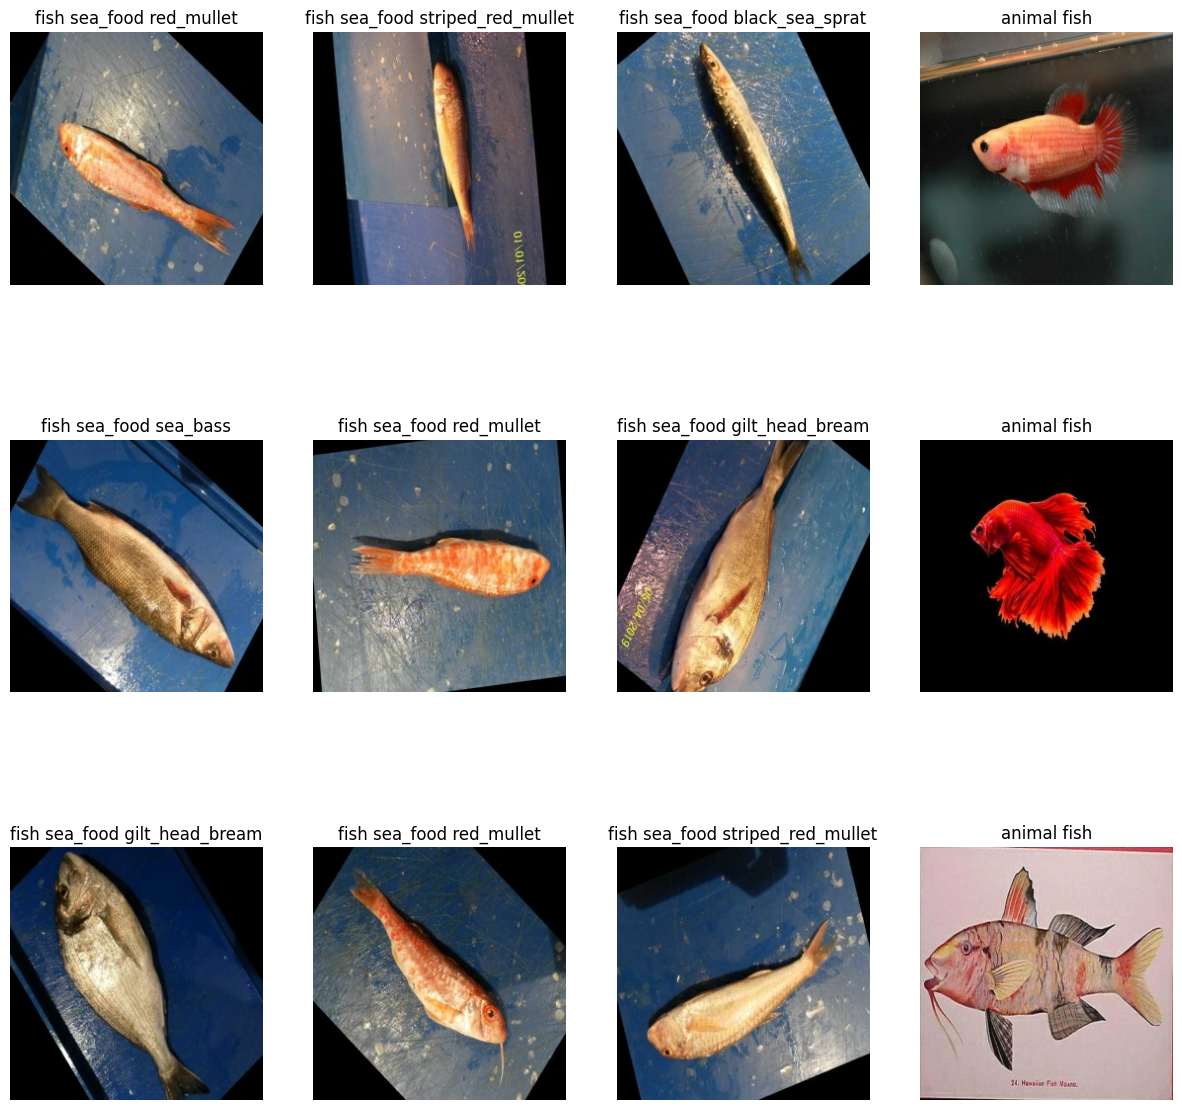

In [50]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) #this is to convert the float into int
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [51]:
# Augmentation for training data
gen_train_img = ImageDataGenerator(
    rescale=1./255,           # Normalize to [0,1]
    rotation_range=20,        # Random rotation
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    width_shift_range=0.2,    # Width shift
    height_shift_range=0.2,   # Height shift
    shear_range=0.15,         # Shear transform
    fill_mode='nearest'       # Filling in new pixels
)

In [52]:
# Only rescaling for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = gen_train_img.flow_from_directory(
    directory=train_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle = True,
    class_mode='categorical'
)

# Load validation data
val_generator = val_test_datagen.flow_from_directory(
    directory=val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load test data
test_generator = val_test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [53]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu", input_shape=(256,256,3))) #input

model.add(MaxPooling2D(pool_size=(2,2))) #pooling layer

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2))) #pooling layer

model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2))) #pooling layer

model.add(Flatten()) #Converting the matrix values into single column

model.add(Dense(128,activation="relu"))

model.add(Dropout(0.5)) #to control overfitting

model.add(Dense(train_generator.num_classes, activation="softmax")) #output 

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"]
              )

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,395 (56.61 MB)

 Trainable params: 14,840,395 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# # 7. Callbacks
# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# # Train the Model
# history = model.fit(
#     train_generator,
#     epochs=12
#     ,
#     validation_data=val_generator,
#     callbacks=[early_stop, checkpoint]
# )

In [ ]:
history = model.fit(train_generator,
          validation_data = val_test_datagen.flow_from_directory(
              val_dir,
              target_size = image_size,
              batch_size = batch_size,
              class_mode = 'categorical'
          ),
          epochs=12)

Found 1092 images belonging to 11 classes.
Epoch 1/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 4556s 23s/step - accuracy: 0.3017 - loss: 1.9265 - val_accuracy: 0.4679 - val_loss: 1.4672
Epoch 2/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 7729s 40s/step - accuracy: 0.4502 - loss: 1.5343 - val_accuracy: 0.6804 - val_loss: 0.9897
Epoch 3/12
144/195 ━━━━━━━━━━━━━━━━━━━━ 2:39:09 187s/step - accuracy: 0.5594 - loss: 1.2177

In [ ]:
# Model Accuracy
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")

In [ ]:
#  Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns

class_labels = list(train_generator.class_indices.keys())

y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#  11. Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

#  Accuracy Graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#  Loss Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('Training & Validation Accuracy / Loss Graph', fontsize=14)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Final Test Accuracy: {accuracy*100:.2f}%")

In [ ]:
#making predictions on a single image.

from tensorflow.keras.preprocessing import image

import numpy as np

# Path to the new image for prediction
img_path = r"E:/62MW9Z31IX0Z.jpg"
# Load and preprocess the image
img = image.load_img(img_path, target_size=(256, 256))  # Resize to match training size
img_array = image.img_to_array(img)                     # Convert to numpy array (H, W, C)
img_array = img_array / 255.0                           # Normalize to [0,1] like training
img_array = np.expand_dims(img_array, axis=0)           # Add batch dimension -> (1, 224, 224, 3)

# Make prediction
pred = model.predict(img_array)
predicted_class_index = np.argmax(pred, axis=1)[0]      # Get index of highest probability

# Map index to class label
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_label}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [ ]:
# Load VGG16 base model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze base layers

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)             #Bigger model, captures more patterns, better for complex datasets

x = Dropout(0.5)(x)                              #Dropout for regularization (avoids overfitting)

predictions = Dense(11, activation='softmax')(x)

# Final model
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('vgg16_best.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model (train_generator and val_generator should be defined before)
history = model_vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint, early_stop]
)

In [ ]:
loss, accuracy = model_vgg16.evaluate(val_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

In [ ]:
loss, accuracy = model_vgg16.evaluate(test_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

#  Predict
y_pred_probs = model_vgg16.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes

#  Class Labels
class_labels = list(val_generator.class_indices.keys())

#  Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix with seaborn
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - VGG16')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#dark color model got confuse and it predicted correctly 43 class light color 

In [ ]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Load ResNet50 base model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256, 3))
base_model.trainable = False  # Freeze base layers

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(11, activation='softmax')(x)

# Final model
model_resnet50 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_resnet50.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


checkpoint = ModelCheckpoint('resnet50_best.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)

# Train the model (train_generator and val_generator should be defined before)
history_resnet50 = model_resnet50.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint, early_stop]
)

loss, accuracy = model_resnet50.evaluate(val_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

loss, accuracy = model_resnet50.evaluate(test_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

In [ ]:
# ✅ Predictions
y_pred_probs = model_resnet50.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# ✅ Class labels
class_labels = list(test_generator.class_indices.keys())

# ✅ Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))

# ✅ Confusion Matrix - Heatmap
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - ResNet50 (Seaborn)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ✅ Bar Plot of Predictions per Class
unique, counts = np.unique(y_pred, return_counts=True)
pred_counts = dict(zip(unique, counts))

plt.figure(figsize=(15, 8))
sns.barplot(x=[class_labels[i] for i in pred_counts.keys()], 
            y=list(pred_counts.values()), palette='magma')
plt.title("Number of Predictions per Class - ResNet50")
plt.xlabel("Classes")
plt.ylabel("Number of Predictions")
plt.show()

In [ ]:
# Plot accuracy and loss graphs for ResNet50
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'], label='Train Loss')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Load pre-trained MobileNet model without top
base_model_mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model_mobile.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model_mobile.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(11, activation='softmax')(x)

model_mobile = Model(inputs=base_model_mobile.input, outputs=output)

# Compile the model
model_mobile.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                      metrics=['accuracy'])

checkpoint_mobile = ModelCheckpoint("best_mobilenet_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_mobile = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_mobile = model_mobile.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint_mobile, early_stop_mobile]
)

In [ ]:
# Predictions for MobileNet
y_pred_probs_mobilenet = model_mobile.predict(test_generator)
y_pred_mobilenet = np.argmax(y_pred_probs_mobilenet, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# ✅ Classification Report (printed)
report = classification_report(y_true, y_pred_mobilenet, target_names=class_labels, output_dict=True)
print(classification_report(y_true, y_pred_mobilenet, target_names=class_labels))

# ✅ Confusion Matrix Heatmap with ORANGE color
cm = confusion_matrix(y_true, y_pred_mobilenet)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - MobileNet (Orange)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Plot accuracy and loss graphs for MobileNet
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_mobile.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobile.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_mobile.history['loss'], label='Train Loss')
plt.plot(history_mobile.history['val_loss'], label='Validation Loss')
plt.title('MobileNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# --- Step 2: Train InceptionV3 Model ---
# Load base InceptionV3 without top layers, pre-trained on ImageNet
base_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(256,256, 3))
base_inception.trainable = False  # Freeze convolution layers to avoid overfitting

# Add new custom classification head
x = base_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
output = Dense(11, activation='softmax')(x)

model_inception = Model(inputs=base_inception.input, outputs=output)
model_inception.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Save the best model only & stop early if no improvement
checkpoint_inception = ModelCheckpoint('inception_best.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_inception = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model
history_inception = model_inception.fit(train_generator, validation_data=val_generator, epochs=5,
                                        callbacks=[checkpoint_inception, early_stop_inception])

In [ ]:
loss, accuracy = model_inception.evaluate(val_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

loss, accuracy = model_inception.evaluate(test_generator)
print(f"Final Test Accuracy: {accuracy*100:.2f}%")

In [ ]:
# True labels
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Predictions for  models
y_pred_inception = np.argmax(model_inception.predict(test_generator), axis=1)


# Print detailed metrics
print("===== Classification Report: InceptionV3 =====")
print(classification_report(y_true, y_pred_inception, target_names=class_labels))



# --- Step 5: Confusion Matrix Plot with seaborn (clear, color-coded) ---
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                 xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.show()

# Generate confusion matrices
cm_inception = confusion_matrix(y_true, y_pred_inception)


plot_confusion_matrix(cm_inception, class_labels, "Confusion Matrix - InceptionV3")

In [ ]:
plt.figure(figsize=(14,6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'], label='InceptionV3 Train')
plt.plot(history_inception.history['val_accuracy'], label='InceptionV3 Validation')

plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'], label='InceptionV3 Train')
plt.plot(history_inception.history['val_loss'], label='InceptionV3 Validation')

plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# EfficientNetB0 base
base_efficient = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256,256, 3))
base_efficient.trainable = False

# Custom top layers
x = base_efficient.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(11, activation='softmax')(x)

model_efficient = Model(inputs=base_efficient.input, outputs=output)

model_efficient.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint_efficient = ModelCheckpoint('efficient_best.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_efficient = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_efficient = model_efficient.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint_efficient, early_stop_efficient]
)

NameError: name 'EfficientNetB0' is not defined

In [ ]:
loss, accuracy = model_efficient.evaluate(val_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

loss, accuracy = model_efficient.evaluate(test_generator)
print(f"Final Test Accuracy: {accuracy*100:.2f}%")

NameError: name 'model_efficient' is not defined

In [ ]:
# Predictions for both models

y_pred_efficient = np.argmax(model_efficient.predict(test_generator), axis=1)

# Print detailed metrics

print("===== Classification Report: EfficientNetB0 =====")
print(classification_report(y_true, y_pred_efficient, target_names=class_labels))


# --- Step 5: Confusion Matrix Plot with seaborn (clear, color-coded) ---
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.show()

# Generate confusion matrices

cm_efficient = confusion_matrix(y_true, y_pred_efficient)

plot_confusion_matrix(cm_efficient, class_labels, "Confusion Matrix - EfficientNetB0")

In [ ]:

# --- Step 6: Training History Visualization (Accuracy & Loss) ---
plt.figure(figsize=(14,6))

# Plot Accuracy
plt.subplot(1, 2, 1)

plt.plot(history_efficient.history['accuracy'], label='EfficientNetB0 Train')
plt.plot(history_efficient.history['val_accuracy'], label='EfficientNetB0 Validation')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)

plt.plot(history_efficient.history['loss'], label='EfficientNetB0 Train')
plt.plot(history_efficient.history['val_loss'], label='EfficientNetB0 Validation')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# --- Step 7: Evaluation Metrics for EfficientNetB0 ---
report_efficient = classification_report(y_true, y_pred_efficient, target_names=class_labels, output_dict=True)

import pandas as pd
report_df = pd.DataFrame(report_efficient).transpose()

print("===== EfficientNetB0 Evaluation Metrics (DataFrame) =====")
print(report_df)

# Visualize precision, recall, f1-score as barplot
plt.figure(figsize=(45, 30))
report_df.iloc[:-3][['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title("EfficientNetB0 - Precision, Recall, F1-Score per Class")
plt.xlabel("Classes")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()